
## 1. Linear Algebra and Ordinary Differential Equations

This notebook is part of a larger effort to offer an approachable introduction to models of the mind and the brain for the course “Foundations of Neural and Cognitive Modelling”, offered at the University of Amsterdam by [Jelle Zuidema](https://staff.fnwi.uva.nl/w.zuidema/). The notebook in this present form is the result of the combined work of Iris Proff, [Marianne de Heer Kloots](http://mdhk.net/), and [Simone Astarita](https://www.linkedin.com/in/simone-astarita-4499b11b5/).

### Instructions

Please hand in the following:
- A copy of this notebook with the **code** and results of running the code filled in the required sections. The sections to complete all start as follows:

<code>### YOUR CODE HERE ###</code>

- A separate pdf file with the answers to the **homework exercises**. These can be identified by the following formatting, where **n** is the number of points (out of 10) that question **m** is worth:
<br>

>***Homework exercise m***: question(s) **(npt)**.

### Introduction

In this lab, we will use Python to study some essential concepts of linear algebra and then experiment with ordinary differential equations (ODEs) and phase portraits. In the first section, we will see the definitions, the notation, and the operations of vectors and matrices. We then explain determinants and eigenvalues of simple matrices, as these concepts will be used in the next weeks. If you already have a lot of experience with linear algebra in Python, you may simply skim or skip this section, but don't forget to complete the homework exercise at the end of it.

In the second section, we will go step by step through a set of instructions to create a phase portrait for a 2-dimensional system of ODEs. Some of the code is given, but you will need to fill in some sections yourself.

### 1. Linear algebra

#### Vectors: definitions

* **Vector space**: a set closed under finite vector addition and scalar multiplication. Examples: $\mathbb{R}$ (or $\mathbb{R}^1$), the set of real numbers; $\mathbb{R}^2$, the set of bidimensional vectors; $\mathbb{R}^3$, the set of tridimensional vectors.


* **Vector**: formally, vectors are members of a vector space, so they can be added together and multiplied by a scalar, while remaining in the same vector space. Visually, think of an arrow (= a line with a direction) situated in the space. In practice, when we use them they look like this: $v = [v_1, v_2, ..., v_{n-1}, v_n]$. In $\mathbb{R}^n$, $v_1, v_2, ..., v_{n-1}, v_n$ are the coordinates of the vector.


* **Scalar**: a ‘scalar’ is the mathematical term for a single number, like 2, 6.7 or 14,000,000.


* **Dimensionality**: number of elements in a vector. It may sometimes be referred to as *length*, especially in programming languages: for example, <code>len([1,2,5,0])</code> returns <code>4</code>, the dimensionality of the vector, in Python.


* **Length** or **Euclidean norm**: the actual length of a vector. It is computed as follows: $|\vec{v}| = \sqrt{v_1^2 + \ldots + v_n^2}$.


* **Scaling**: modifying (= multiplying) the length of a vector $v$ by a scalar value $a$: $a \times \vec{v} = \vec{u}$ with $u_i = a \times v_i$.


* **Vector addition**: adding together vectors of the same dimensionality (= that belong to the same vector space): $\vec{v} + \vec{w} = \vec{w} + \vec{v} = \vec{u}$ with $u_i = v_i + w_i$.


* **Vector multiplication or dot product**: multiplying together vectors of the same dimensionality, which results in a scalar: $\vec{v} \times \vec{w} = \vec{w} \times \vec{v} = a$, with $a = \sum v_i \times w_i$. In Python, we use the command <code>dot(v,w)</code> or <code>v @ w</code>.


* **Linear dependence**: two vectors $\vec{v}$ and $\vec{w}$ are linearly dependent if and only if $\vec{v}=a\vec{w}$ for some scalar $a$.

In order to deal with vectors and matrices in Python, we use the *numpy* package. When writing <code>import numpy as np</code> in the beginning of our script, we can access all numpy functions using the shortcut <code>np</code>.

The following cell contains some commands to create vectors and matrices. Figure out how the functions work.

In [2]:
# package for basic algebra
import numpy as np

#  creating basic row and column vectors and matrices
v1   = np.array([1,2,3])
v2   = np.array([[1],[2],[3]])
m1 = np.array([[1, 2],[3, 4],[5,6]])

# other ways to make vectors and matrices
v3   = np.repeat(1,3)       
v4   = np.arange(1,5,0.5)   
v5   = np.zeros([1,2])  
v6   = np.random.random(3)
v7   = np.random.randint(1,10,4)
m2   = np.identity(3)

In [ ]:
print(v1) # check the values the different variables get by running the code above and changing v1 into v2, v3 etc in this cell, and running it..

#### Matrices: definitions

* **Matrix**: a 2D array of numbers, so it has one or more columns and one or more rows (A vector is a matrix with either only one column or only one row; note that in Python, by default, there is no difference between row and column vectors). 


* **Size**: the **height** (= number of rows) times the **width** (= number of columns) of a matrix.


* **Scaling**: modifying (= multiplying) each number in a matrix $A$ by a scalar value $c$: $c \times A = B$, with $B_{i,j} = c \times A_{i,j}$.


* **Addition**: adding each number of two matrices together $A + B = B + A = C$, with $c_{i,j} = a_{i.j} + b_{i,j}$, only if A and B same sizes.


* **Multiplication:** you can multiply two matrices to obtain a single matrix. In particular, $A \times B = C$, with $c_{ij} = \sum_{k=1}^pa_{ik}b_{kj}$, only if the number columns in $A$ is the same as the number of rows in $B$ (and said number is $p$).


Example:    

$\begin{pmatrix}-1 & 2\\ 4 & 1 \end{pmatrix}
\times
\begin{pmatrix}4 & 1\\ 3 & 5 \end{pmatrix}
= \begin{pmatrix} -1 \cdot 4+2 \cdot 3 & -1 \cdot 1+2 \cdot 5 \\ 4 \cdot 4 + 1 \cdot 3 & 4 \cdot 1 + 1 \cdot 5 \end{pmatrix}
= \begin{pmatrix}2 & 9\\ 19 & 9 \end{pmatrix}$ 

In Python, use <code>np.dot(A,B)</code> or <code>A@B</code> to compute the matrix product of $A$ and $B$.

<br>

> 
> * Use Python to create two matrices $A$ and $B$ with $A \ne B$ and that satisfy the conditions for **multiplication**. Compute $A \times B$ and $B \times A$: is the result the same? Briefly explain the result in a comment in the code.
> 
> * Play around to understand the difference between <code>np.dot(v1,v2)</code> and <code>v1*v2</code>, where <code>v1</code> and <code>v2</code> are vectors or matrices. 
> 
> * Type <code>B.shape</code> and <code>B.size</code>. What information do the commands provide?

In [ ]:
### YOUR CODE HERE ###

###

#### Vector transformations

Multiplying a vector with a square matrix transforms the vector:  $A * \vec{v} = \vec{w}$. Usually the new vector has a new direction or length, or both. 

Create a 2x2 square matrix and apply it to different vectors to see what linear transformations it defines. Plot your results to get a better understanding.

You can define a special matrix $A$ – called the rotation matrix – that only rotates (and does not scale) a vector as follows. After applying this matrix to a vector, the new vector has the same length but a different direction. $\Phi$  defines the angle of the rotation, where $360^{\circ}$ corresponds to $\Phi = 2\pi$.
 
 
$ A\vec{v} = $$\begin{pmatrix} cos\phi&-sin\phi \\\ sin\phi&cos\phi\end{pmatrix}$$\left(\begin{array}{c}v_x \\ v_y\end{array}\right) = $$
\begin{pmatrix} v_xcos\phi - v_ysin\phi \\\ v_xsin\phi + v_ycos\phi \end{pmatrix}$
        
<br>

In the following, we draw the vector $\vec{v} = \begin{pmatrix}0.5 \\0.5\end{pmatrix}$. We then create a matrix that rotates a vector by 45 degrees (the code applies it to the vector $\vec{v}$, and draws the resulting vector in red in the same figure) . Note: the code uses <code>math.pi</code> for $\pi$; to divide real numbers e.g. $5$ and $2$, we use the following notation: <code>5./2.</code>.

> Try rotating the vector by 90, 180, 270 and 360 degrees by changing the value of <code>phi</code>.

In [ ]:
# package for plotting
import matplotlib.pyplot as plt
import math

v = np.array([0.5,0.5])
plt.arrow(0,0,0.5,0.5, head_width = 0.03, color = 'black')
### YOUR CODE HERE ###
# change the value of phi
phi = 1./4. * math.pi
A = np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi),np.cos(phi)]])
w = np.dot(A,v)
plt.arrow(0,0,w[0],w[1], head_width = 0.03, color = 'red')

# set the axis to the -1,1 range, and plot in a nice square
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

###

#### Determinant and trace
Two interesting values of a square matrix are the *determinant* and the *trace*. The determinant of a $2\times2$ matrix is computed as follows:

$A = \left( \begin{array}{cc}    a     & b \\    c     & d    \end{array} \right), 
\quad \det(A)=\left| \begin{array}{cc}  a & b \\c& d \end{array} \right| = ad - cb$ 

The *trace* of a matrix is the sum of the main diagonal, which is the one from upper left to lower right. So, in a $2\times2$ matrix:

$A = \left( \begin{array}{cc}    a     & b \\    c     & d    \end{array} \right), 
\quad \text{tr}(A)=\left| \begin{array}{cc}  a & b \\c& d \end{array} \right| = a+d$

#### Eigenvectors and eigenvalues

When a matrix $M$ is multiplied with a vector, this yields a new vector, as explained above. For most vectors, both the length and the direction changes. Some vectors however do not get not rotated by mutliplication with $M$ or any other square matrix. For these vectors, it holds that $M\times \vec{v} = \lambda\vec{v}$. In other words, the vectors get only scaled by the matrix. These are so-called eigenvectors. The corresponding scaling factor $\lambda$ is called the eigenvalue.

Let’s now see how we can compute eigenvectors and eigenvalues of a  $2\times2$ matrix.

$M \vec{v} = \lambda \vec{v}$ can be rewritten as:

$$
\begin{align*}
\left( \begin{array}{cc} a & b \\ c & d \end{array} \right)\left( \begin{array}{cc} v_x \\ v_y  \end{array} \right) &= \lambda \left( \begin{array}{cc} v_x \\ v_y  \end{array} \right)\\
\left( \begin{array}{cc} a & b \\ c & d \end{array} \right)\left( \begin{array}{cc} v_x \\ v_y  \end{array} \right) -\lambda \left( \begin{array}{cc} v_x \\ v_y  \end{array} \right) &= \left( \begin{array}{cc} 0 \\ 0  \end{array} \right)\\
\left( \begin{array}{cc} a-\lambda & b \\ c & d-\lambda \end{array} \right)\left( \begin{array}{cc} v_x \\ v_y  \end{array} \right)  &= \left( \begin{array}{cc} 0 \\ 0  \end{array} \right)\\
\end{align*}
$$

From this, we can derive the so-called *characteristic equation*:

$$
\begin{align*}
(a-\lambda)(d-\lambda)-bc&=0 \\
\lambda^2 - (a+d)\lambda + ad -bc&=0 \\
\end{align*}
$$

This equation can be solved to obtain the eigenvalues $\lambda_{1,2}$. The corresponding eigenvectors $v$ can be obtained by solving the following equation:

$$
\begin{align*}
\left( \begin{array}{cc} a-\lambda & b \\ c & d-\lambda \end{array} \right)\left( \begin{array}{cc} v_x \\ v_y  \end{array} \right)  &= \left( \begin{array}{cc} 0 \\ 0  \end{array} \right)\\
\end{align*}
$$

This yields $v_{1,2}=\begin{pmatrix}-b\\a-\lambda_{1,2}\end{pmatrix}$ as eigenvectors for the eigenvalues $\lambda_{1,2}$, respectively.

If $\vec{v}$ is an eigenvector of a matrix $M$, then for an arbitrary number $k$, $k \vec{v}$ is also an eigenvector, with the same eigenvalue. In other words, eigenvectors are not unique.  An $n\times n$ square matrix has a maximum of $n$ eigenvalues, and equally many *linearly independent* eigenvectors. Two vectors are linarly independent if they are not scaled versions of each other.

<br>

> Consider a matrix $M=\begin{pmatrix}1&2\\2&1\end{pmatrix}$: we can use the  Python function <code>np.linalg.eig()</code> to compute eigenvalues and eigenvectors of the matrix $M$ (see cell below). Try to find matrices that have negative and/or complex eigenvalues using the code.

In [ ]:
### YOUR CODE HERE ###

# try to find matrices with negative and/or complex eigenvalues by changing the values of M

# the matrix
M = np.array([[1,2],[2,1]])

# np.linalg.eig() creates a tuple of two arrays containing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(M)

# print eigenvalues and eigenvectors
# note: the COLUMNS of "eigenvectors" are the eigenvectors
print(eigenvalues)
print(eigenvectors)

# see the first eigenvalues and corresponding eigenvector
eigenvalue1 = eigenvalues[0]
eigenvector1 = eigenvectors[:,0]
eigenvalue2 = eigenvalues[1]
eigenvector2 = eigenvectors[:,1]

print(eigenvalue1, eigenvector1)
print(eigenvalue2, eigenvector2)

> Check the eigenvector/eigenvalue condition for both eigenvalues and eigenvectors. Remember: $\vec{v}$ is an eigenvector of a matrix $M$ if:
>
> $$ M \vec{v} = \lambda \vec{v} $$

In [ ]:
### YOUR CODE HERE ###

# pick the eigenvalues and eigenvectors from the cell above
# then do the relevant multiplications

####

> ***Homework exercise 1***: What are the determinant, trace, eigenvalues and corresponding eigenvectors of matrix $M=\begin{pmatrix}5&2\\4&3\end{pmatrix}$? You have to first calculate all 4 of them yourself, then use the code to check that the eigenvalues and eigenvectors are correct. **(1.5pt)**

In [ ]:
### YOUR CODE HERE

# define M

M = np.array([])

# copy-paste the code from above to calculate eigenvalues and their respective eigenvectors

####



---



---



---



### 2. Ordinary Differential Equations

#### 2.1. Phase portraits of 1-dimensional ODEs

A phase portrait is a visual representation of the trajectories of a dynamical system. 

Let's first consider a 1-dimensional ODE:

<center>
    \begin{equation}
        \frac{dx}{dt}=2-0.1*x
    \end{equation}
</center>

> ***Homework exercise 2:*** Let's assume that the variable $x$ denotes the speed of an object. What information does the equation above provide? **(0.5pt)**

The code below plots a one-dimensional vector field for our ODE. That means, at a range of $x$ values, it draws an arrow pointing into the direction of the derivative $dx$. Moreover, it also plots the derivative $\frac{dx}{dt} = 2-0.1*x$ and the corresponding function, $f(x) = 2x - \frac{x^2}{20}$ (assuming the constant $c = 0$). To plot vectors field, we use the <code>quiver</code> function from the <code>matplotlib.pyplot</code> library.

Note that, for visual reasons, we rather define the values for the $\frac{dx}{dt}$ and for the vector field differently, as too many arrows make it hard to understand which direction the vectors are going, but the ODE is still the same. If this does not make sense to you, try to chance <code>x_vecs</code> below with the code that defines <code>x</code>: what happens? Similarly, play around with the values of <code>plt.xlim</code> and <code>plt.ylim</code> to get a good picture of both $\frac{dx}{dt}$ and $f(x)$.

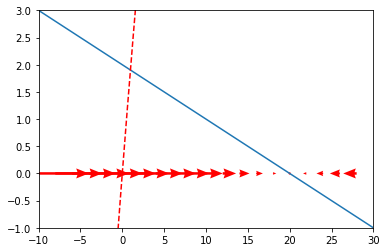

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np

# package to solve ODEs
from scipy.integrate import odeint

# define values to be evaluated for the ODE
x = np.arange(-10,30,0.1)

# define ODE
dx = 2-0.1*x

# define values to be evaluated for the vector field
x_vecs = np.arange(-10,30,2)
y_vecs = np.repeat(0,len(x_vecs))

# define ODE for the vector field
dx_vecs = 2-0.1*x_vecs

# plot vector field
fig, ax = plt.subplots()
q = ax.quiver(x_vecs, y_vecs, dx_vecs, 0, color = 'r',  scale = 20,  headwidth= 4)

# plot the derivative
plt.plot(x,dx)

# plot the function f(x)
plt.plot(x,2*x-(x**2/20),'--r')

# the limits of the graphs
plt.xlim(-10,30)
plt.ylim(-1,3)

plt.show()

In a similar way, create a phase portrait of:

<center>
    \begin{equation}
        \frac{dx}{dt} = sin(x)
    \end{equation}
</center>

> Write your code in the following cell; some obvious parts are already in there for you. Remember to also include the integral of $sin(x)$, that is the function $f(x)$ from which the funciton is taken from: it helps you check that your vector field actually makes sense.

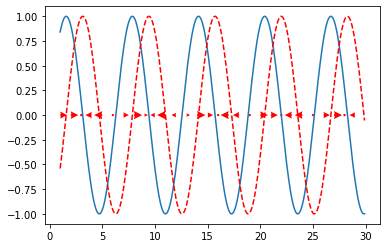

In [5]:
### YOUR CODE HERE ###

### SOLUTION ###

# define values to be evaluated
x = np.arange(1,30,0.1)
x_vecs = np.arange(1,30,1)
y = np.repeat(0,len(x_vecs))

# define ODE
dx_vecs = np.sin(x_vecs)
dx = np.sin(x)


# plot vector field
fig, ax = plt.subplots()
q = ax.quiver(x_vecs, y, dx_vecs, 0,  color = 'r',scale = 40, headwidth = 5) 

plt.plot(x,dx)
plt.plot(x,-np.cos(x),'--r')
plt.plot(x,-np.cos(x),'--r')

plt.show()

###

#### 2.2. Phase portraits of 2-dimensional ODEs

Now let's consider the 2-dimensional case. We work with a system of two linear first-order ODEs, defined by:

$$
\begin{equation}
\left\{ \begin{array}{c}
\frac{dx}{dt} = a x + b y \\
\frac{dy}{dt} = c x + d y
\end{array} \right.
\end{equation}
$$

where $x$ and $y$ are independent variables and $a$, $b$, $c$ and $d$ are parameters.

Whether this system has a stable equilibrium depends on the value of the parameters. By investigating the phase portrait, we examine how the behavior of the system changes with its parameter values. 

#### Generating the data 
To create a phase portrait, we first generate a grid of points $(x, y)$ at which we want to compute $dx$ and $dy$. We do this by creating a vector with $x$-values and a vector with $y$−values (decide for yourself if you like the current ranges for $x$ and $y$ values). We then create two arrays that together contain all combinations of $x$ and $y$ using the <code>np.meshgrid</code> function.


In [ ]:
### GENERATE DATA ###

# make a grid of x and y values
x = np.arange(-2, 2, 0.25)
y = np.arange(-2, 2, 0.25)
x_vals, y_vals = np.meshgrid(x, y)

We want to compute $dx$ and $dy$ at all points (<code>x_vals[i,j]</code>, <code>y_vals[i,j]</code>): we write a
function to easily compute these two components. 

>Create a function called <code>dxdy</code> that takes an $x$ and $y$ value as input, and a vector containing the parameters $a$, $b$, $c$ and $d$ and returns a vector containing $dx$ and $dy$.

In [ ]:
### this is the definition of our 2-dimensional ODE
def dxdy(x,y, param):
    ### YOUR CODE HERE
    # remember: param = (a,b,c,d)
    dx =
    dy =
    return (dx, dy)

We can then use the function to compute the derivative at all previously defined
points in the state space using a loop. We store these components in two arrays
called <code>x_dirs</code> and <code>y_dirs</code>.

In [ ]:
# COMPUTE ODE values

# example values
a = -2 ; b = 1 ; c = 1 ; d = -2

# set parameters for the ODE
param = (a,b,c,d)

# evaluate ODE at all points in our grid
x_dirs = np.empty((len(x_vals),len(x_vals)))
y_dirs = np.empty((len(x_vals),len(x_vals)))

for i in np.arange(0,len(x_vals)):
    for j in np.arange(0,len(x_vals)):
        dir = dxdy(x_vals[i,j], y_vals[i,j], param)
        x_dirs[i,j] = dir[0]
        y_dirs[i,j] = dir[1]

Now that we have generated the data we needed, we can generate a vector field. Vary the parameters $a$, $b$, $c$ and $d$ in the cell above to see if you can get qualitatively different types of phase portraits.

In [ ]:
### PLOT VECTOR FIELD ###

fig, ax = plt.subplots()
q = ax.quiver(x, y, x_dirs, y_dirs) #X: xlocations Y: ylocations U: xdirections V: ydirections
plt.draw()

###

You can also play with it: draw vector fields for the dynamical systems defined by some parameter matrices, and try and see what type of equilibrium do they yield.

#### Drawing nullclines

To get a more complete phase portrait, we also want to include the nullclines in the plot.
The $x$-nullcline is the set of points where $\frac{dx}{dt}= 0$, the $y$-nullcline is the set of points where
$\frac{dy}{dt}= 0$. The general definition of nullcline is a little more involved, but these work for our (2-dimensional) purposes.

>***Homework exercise 3***: Analytically (with pen & paper!) determine the two nullclines by finding the solutions to $\frac{dx}{dt}= 0$ and $\frac{dy}{dt}= 0$ as a function of $a$, $b$, $c$ and $d$ (and $x$). Both your solutions should be of the form $y = f(x, a, b, c, d)$ i.e. you must not have numbers in place of constants and variables. Specify what assumptions, if any, you make about the them in order to provide your solution. **(1.5pt)** Show analytically (i.e. using the equations you just found) that $(0, 0)$ is always an equilibrium. **(0.5pt)**

We now create a function $x$-nullcline and a function $y$-nullcline that return the $y$-values for the $x$- and $y$-nullclines as a function of $x$ and a vector containing the parameters $a$, $b$, $c$ and $d$. Use these functions to plot the $x$ and the $y$ nullcline.

In [ ]:
### NULLCLINES ###

# definition of the x and y nullcline
def x_nullcline(x,params):
    return -params[0]*x/params[1]

def y_nullcline(x,params):
    return -params[2]*x/params[3]

# plot nullclines
plt.plot(x,x_nullcline(x,param))
plt.plot(x,y_nullcline(x,param))
plt.ylim((-2,2))
plt.xlim((-2, 2))
plt.draw()

###

####  Drawing trajectories
To draw trajectories through the statespace, we use the function <code>odeint</code> from the <code>scipy.integrate</code> package. The function <code>odeint</code> takes the following inputs: the state vector (containing the values $x$ and $y$), the times at which output is required ($t$), the function that returns the rate of change ($\frac{dx}{dy}$), and the parameter vector ($param$).

The odeint function requires a specific format for the description of the system; you can use the following function, which uses the function <code>dxdy</code> you wrote yourself before:


In [ ]:
# this is the definition of our 2-dimensional ODE

def ode_system(state, t, param):
    x = state [0]
    y = state [1]
    # Here we us the dxdy function
    return (dxdy(x, y, param))

We can now use the odeint function to compute a trajectory starting from <code>x_init</code> and <code>y_init</code>. In the top of the following cell, copy the pieces of code you wrote above to make the vector field and to plot the nullclines to create a full phase portrait.

In [ ]:
# plot vectorfield
fig, ax = plt.subplots()
q = ax.quiver(x, y, x_dirs, y_dirs)

# plot nullclines
plt.plot(x,x_nullcline(x,param))
plt.plot(x,y_nullcline(x,param))
plt.ylim((-2,2))
plt.xlim((-2, 2))
plt.draw()

###

### TRAJECTORIES ###
# make grid of initial values for trajectories
x_init = np.arange(-1, 2, 1)
y_init = np.arange(-1, 2, 1)
x_grid, y_grid = np.meshgrid(x_init, y_init)
plt.plot(x_grid,y_grid,'bo')

# time points to evaluate
t = np.arange(1,6,0.01)

# compute trajectories for each point on grid
for i in np.arange(0,len(x_init)):
    for j in np.arange(0,len(x_init)):
        state = np.array([x_init[i], y_init[j]])
        trajectory = odeint(ode_system, state, t, args = (param,))
        plt.plot(trajectory[:,0],trajectory[:,1],'k')
        
plt.draw()

From the ODEs given above, we can extract the parameter matrix $M = \left( \begin{array}{cc}    a     & b \\    c     & d    \end{array} \right)$.

The properties of this matrix can inform us about the behavior of the system. This is because we can view the current position in state space as a vector $\left( \begin{array}{c} x \\ y \end{array} \right)$, and one step of the dynamics defined by our dynamical system as multiplying with $M$.

The following table summarizes the relationship between equilibrium types and the properties of their matrices:

| Equilibrium type | Eigenvalues |Determinant and Trace|
|:-------	|:------	|:----- 	|
| (1) Saddle point | Real, opposite sign | $\text{Det} < 0$ |
| (2) Stable node | Real, negative | $0 < \text{Det} < \frac{\text{Tr}^2}{4}$ <br> $\text{Tr} < 0$ |
| (3) Unstable node | Real, positive | $0 < \text{Det} < \frac{\text{Tr}^2}{4}$ <br> $\text{Tr} > 0$ |
| (4) Stable spiral | Complex, negative real part | $0 < \frac{\text{Tr}^2}{4} < \text{Det}$ <br> $\text{Tr} < 0$ |
| (5) Unstable spiral | Complex, positive real part | $0 < \frac{\text{Tr}^2}{4} < \text{Det}$ <br> $\text{Tr} > 0$ |
| (6) Center point | Complex, zero real part | $\text{Det} > 0$ <br> $\text{Tr} = 0$ |

Here you can see the graphical representations of the equilibria:

![image](https://raw.githubusercontent.com/clclab/FNCM/main/book/Lab1-dettr.png)

Finally, you can see the interaction between equilibria shape and eigenvalues, determinant, and trace in [this YouTube video](https://www.youtube.com/watch?v=48BMz9db71E&list=PL8erL0pXF3JYiEz1b8eLPq49aDeMBF99C&index=50) or at [this page](http://www.math.stonybrook.edu/~scott/mat308.spr11/demovie.html).

>***Homework exercise 4:*** Find parameters for which the system has all six types of equilibria. For each of them, hand in the corresponding phase portait plots, report the corresponding matrix and its eigenvalues and eigenvectors, using the function <code>np.linalg.eig()</code>. Briefly show that you results are consistent with what is mentioned in the table above. **(6pt)**
<br>

In [ ]:
### YOUR CODE HERE ###

# copy-paste the code from above, just change the values of parameters in param

###